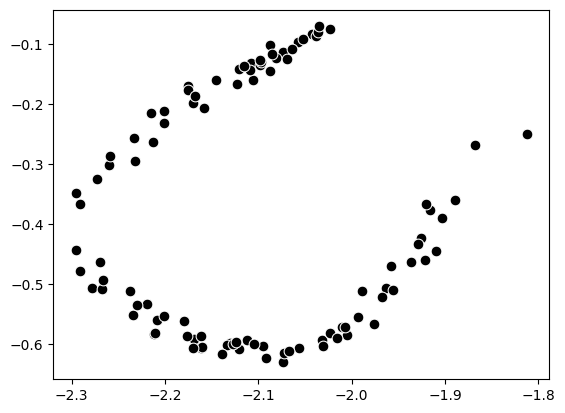

Cost after iteration 0: 130.836006
Cost after iteration 100: 96.326830
Cost after iteration 200: 73.486381
Cost after iteration 300: 62.238682
Cost after iteration 400: 57.631407
Cost after iteration 500: 55.460416
Cost after iteration 600: 54.222914
Cost after iteration 700: 53.428302
Cost after iteration 800: 52.877693
Cost after iteration 900: 52.475331
Cost after iteration 1000: 52.169418
Cost after iteration 1100: 51.929542
Cost after iteration 1200: 51.736727
Cost after iteration 1300: 51.578552
Cost after iteration 1400: 51.446566
Cost after iteration 1500: 51.334834
Cost after iteration 1600: 51.239069
Cost after iteration 1700: 51.156105
Cost after iteration 1800: 51.083554
Cost after iteration 1900: 51.019583
Cost after iteration 2000: 50.962762
Cost after iteration 2100: 50.911961
Cost after iteration 2200: 50.866273
Cost after iteration 2300: 50.824967
Cost after iteration 2400: 50.787441
Cost after iteration 2500: 50.753200
Cost after iteration 2600: 50.721831
Cost after i

KeyboardInterrupt: 

In [23]:
import numpy as np

import matplotlib.pyplot as plt

datapath = "datasets/universal_autoencoder_samples.csv"

# import data
X = np.loadtxt(datapath, delimiter=",")

plt.scatter(X[0, :], X[1, :], c="k", s=60, linewidth=0.75, edgecolor="w")
plt.show()

# 数据标准化
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std


# 参数初始化
def initialize_parameters(input_size, hidden_size, latent_size):
    params = {
        "W1": np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size),
        "b1": np.zeros((1, hidden_size)),
        "W2": np.random.randn(hidden_size, latent_size) * np.sqrt(2.0 / hidden_size),
        "b2": np.zeros((1, latent_size)),
        "W3": np.random.randn(latent_size, hidden_size) * np.sqrt(2.0 / latent_size),
        "b3": np.zeros((1, hidden_size)),
        "W4": np.random.randn(hidden_size, input_size) * np.sqrt(2.0 / hidden_size),
        "b4": np.zeros((1, input_size)),
    }
    return params


# 激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2


# 前向传播
def forward_propagation(X, params):
    Z1 = X.dot(params["W1"]) + params["b1"]
    A1 = np.tanh(Z1)
    Z2 = A1.dot(params["W2"]) + params["b2"]
    A2 = sigmoid(Z2)  # Latent space
    Z3 = A2.dot(params["W3"]) + params["b3"]
    A3 = np.tanh(Z3)
    Z4 = A3.dot(params["W4"]) + params["b4"]
    A4 = sigmoid(Z4)  # Reconstruction
    cache = (Z1, A1, Z2, A2, Z3, A3, Z4, A4)
    return A4, cache


# 计算损失
def compute_cost(Y, Y_hat):
    m = Y.shape[0]
    cost = (1 / m) * np.sum((Y - Y_hat) ** 2)
    return cost


# 反向传播
def backward_propagation(X, cache, params):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = cache
    m = X.shape[0]

    dZ4 = (A4 - X) * A4 * (1 - A4)
    dW4 = 1 / m * A3.T.dot(dZ4)
    db4 = 1 / m * np.sum(dZ4, axis=0, keepdims=True)

    dA3 = dZ4.dot(params["W4"].T)
    dZ3 = dA3 * tanh_derivative(Z3)
    dW3 = 1 / m * A2.T.dot(dZ3)
    db3 = 1 / m * np.sum(dZ3, axis=0, keepdims=True)

    dA2 = dZ3.dot(params["W3"].T)
    dZ2 = dA2 * A2 * (1 - A2)
    dW2 = 1 / m * A1.T.dot(dZ2)
    db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2.dot(params["W2"].T)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = 1 / m * X.T.dot(dZ1)
    db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
        "dW3": dW3,
        "db3": db3,
        "dW4": dW4,
        "db4": db4,
    }
    return grads


# 参数更新
def update_parameters(params, grads, learning_rate):
    for key in params:
        params[key] -= learning_rate * grads["d" + key]
    return params


# 模型训练
def model(X, hidden_size, latent_size, learning_rate, num_iterations):
    input_size = X.shape[1]
    params = initialize_parameters(input_size, hidden_size, latent_size)

    # 标准化数据
    X_norm, _, _ = normalize_data(X)

    for i in range(num_iterations):
        # 前向传播
        Y_hat, cache = forward_propagation(X_norm, params)

        # 计算损失
        cost = compute_cost(X_norm, Y_hat)

        # 反向传播
        grads = backward_propagation(X_norm, cache, params)

        # 更新参数
        params = update_parameters(params, grads, learning_rate)

        if i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    return params


# 假设 X 是我们的数据，可以如此调用 model 函数
params = model(X, hidden_size=10, latent_size=3, learning_rate=0.01, num_iterations=1000000)

In [14]:
import numpy as np


def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

In [15]:
def initialize_parameters(input_size, hidden_size, latent_size):
    params = {
        "W1": np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size),
        "b1": np.zeros((1, hidden_size)),
        "W2": np.random.randn(hidden_size, latent_size) * np.sqrt(2.0 / hidden_size),
        "b2": np.zeros((1, latent_size)),
        "W3": np.random.randn(latent_size, hidden_size) * np.sqrt(2.0 / latent_size),
        "b3": np.zeros((1, hidden_size)),
        "W4": np.random.randn(hidden_size, input_size) * np.sqrt(2.0 / hidden_size),
        "b4": np.zeros((1, input_size)),
    }
    return params

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def forward_propagation(X, params):
    Z1 = X.dot(params["W1"]) + params["b1"]
    A1 = np.tanh(Z1)
    Z2 = A1.dot(params["W2"]) + params["b2"]
    A2 = sigmoid(Z2)  # Latent space
    Z3 = A2.dot(params["W3"]) + params["b3"]
    A3 = np.tanh(Z3)
    Z4 = A3.dot(params["W4"]) + params["b4"]
    A4 = sigmoid(Z4)  # Reconstruction
    return A4, A2, A1, A4 - X


def compute_cost(Y, Y_hat):
    m = Y.shape[0]
    cost = (1 / m) * np.sum((Y - Y_hat) ** 2)
    return cost

In [17]:
def backward_propagation(X, Y_hat, A1, A2, A3, params):
    m = X.shape[0]
    dZ4 = (Y_hat - X) * Y_hat * (1 - Y_hat)
    dW4 = 1 / m * A3.T.dot(dZ4)
    db4 = 1 / m * np.sum(dZ4, axis=0, keepdims=True)

    # 后续反向传播步骤...
    # 更新params中的参数

    return grads

In [ ]:
def update_parameters(params, grads, learning_rate):
    for key in params:
        params[key] -= learning_rate * grads["d" + key]
    return params

In [ ]:
def model(X, hidden_size, latent_size, learning_rate, num_iterations):
    input_size = X.shape[1]
    params = initialize_parameters(input_size, hidden_size, latent_size)

    # 标准化数据
    X_norm, _, _ = normalize_data(X)

    for i in range(num_iterations):
        # 前向传播
        Y_hat, A1, A2, A3 = forward_propagation(X_norm, params)

        # 计算损失
        cost = compute_cost(X_norm, Y_hat)

        # 反向传播
        grads = backward_propagation(X_norm, Y_hat, A1, A2, A3, params)

        # 更新参数
        params = update_parameters(params, grads, learning_rate)

        if i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    return params

feiwu

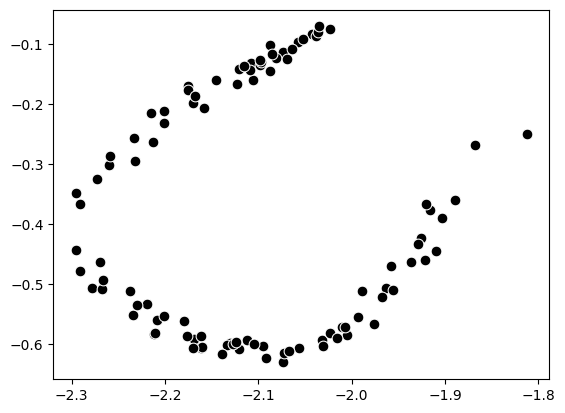

In [3]:
import numpy as np
import matplotlib.pyplot as plt

datapath = "datasets/universal_autoencoder_samples.csv"

# import data
X = np.loadtxt(datapath, delimiter=",")

plt.scatter(X[0, :], X[1, :], c="k", s=60, linewidth=0.75, edgecolor="w")
plt.show()

In [8]:
import numpy as np
import pandas as pd

# Load the dataset
datapath = "datasets/universal_autoencoder_samples.csv"

# Load the data with correct header processing
data = pd.read_csv(datapath, header=None)

# Standardize the data
data_normalized = (data - data.mean()) / data.std()

# Display the first few rows of the normalized data
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,...,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107
1,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,...,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107


In [9]:
def initialize_weights(layer_sizes):
    weights = []
    biases = []

    # Initialize weights with small random values and biases with zeros
    for i in range(len(layer_sizes) - 1):
        w = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.2
        b = np.zeros((1, layer_sizes[i + 1]))
        weights.append(w)
        biases.append(b)

    return weights, biases


# Encoder and decoder layer sizes
encoder_layer_sizes = [2, 10, 10, 1]
decoder_layer_sizes = [1, 10, 10, 2]

# Initialize weights and biases for encoder and decoder
encoder_weights, encoder_biases = initialize_weights(encoder_layer_sizes)
decoder_weights, decoder_biases = initialize_weights(decoder_layer_sizes)

(encoder_weights, encoder_biases), (decoder_weights, decoder_biases)

(([array([[-0.09681073,  0.01451214, -0.15373202,  0.23939517, -0.01201425,
           -0.33772163, -0.16111803, -0.02783415, -0.13692886, -0.51476792],
          [-0.43770125, -0.25697836, -0.24377369, -0.2349783 , -0.089019  ,
           -0.10641027,  0.14703934,  0.18240659,  0.05671471, -0.22765711]]),
   array([[ 0.05427282,  0.11813321, -0.12889985,  0.15755806, -0.15366374,
           -0.299613  ,  0.15575847,  0.16183763,  0.17979419, -0.24891472],
          [-0.13116284,  0.00917201,  0.01971631,  0.08096647, -0.43127596,
            0.34400933,  0.06696745,  0.21501815,  0.18139296, -0.11186221],
          [-0.07638902,  0.14323811, -0.3288027 ,  0.4402575 , -0.08374114,
            0.31800007,  0.04851532, -0.22416992, -0.06579997, -0.01523188],
          [ 0.0616025 , -0.17363331, -0.22952552, -0.0427106 ,  0.23606905,
            0.09043685, -0.06992902, -0.25868293, -0.11267093,  0.5563628 ],
          [ 0.15167263,  0.22206784, -0.07620781, -0.35737724, -0.26981982,
    

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward_pass(x, weights, biases, activation_fn=sigmoid):
    activations = [x]
    for w, b in zip(weights, biases):
        z = np.dot(activations[-1], w) + b
        a = (
            activation_fn(z) if activation_fn else z
        )  # Use identity function if activation_fn is None
        activations.append(a)
    return activations


def compute_loss(y_true, y_pred):
    # Mean squared error loss
    return ((y_true - y_pred) ** 2).mean()


# Example forward pass on the normalized data
x_sample = data_normalized.iloc[
    :, :2
].values  # Take only two features as input to the encoder

# Forward pass through the encoder
encoder_activations = forward_pass(x_sample, encoder_weights, encoder_biases)

# Last layer of encoder to first layer of decoder (latent space representation)
latent_representation = encoder_activations[-1]

# Forward pass through the decoder
decoder_activations = forward_pass(
    latent_representation, decoder_weights, decoder_biases, activation_fn=None
)

# Compute initial loss (using the first two features for simplicity in demonstration)
initial_loss = compute_loss(x_sample, decoder_activations[-1])

initial_loss

0.5006005207828648

In [11]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


def backward_pass(
    y_true,
    encoder_activations,
    decoder_activations,
    encoder_weights,
    encoder_biases,
    decoder_weights,
    decoder_biases,
    learning_rate=0.01,
):
    encoder_grads_w = [np.zeros_like(w) for w in encoder_weights]
    encoder_grads_b = [np.zeros_like(b) for b in encoder_biases]
    decoder_grads_w = [np.zeros_like(w) for w in decoder_weights]
    decoder_grads_b = [np.zeros_like(b) for b in decoder_biases]

    # Compute the error at the output
    output_error = 2 * (decoder_activations[-1] - y_true)

    # Backprop through decoder
    delta = output_error
    for i in reversed(range(len(decoder_weights))):
        prev_activation = encoder_activations[-1] if i == 0 else decoder_activations[i]
        decoder_grads_w[i] = np.dot(prev_activation.T, delta)
        decoder_grads_b[i] = np.sum(delta, axis=0, keepdims=True)
        delta = np.dot(delta, decoder_weights[i].T) * sigmoid_derivative(
            prev_activation
        )

    # Backprop through encoder
    for i in reversed(range(len(encoder_weights))):
        prev_activation = x_sample if i == 0 else encoder_activations[i]
        encoder_grads_w[i] = np.dot(prev_activation.T, delta)
        encoder_grads_b[i] = np.sum(delta, axis=0, keepdims=True)
        if i != 0:
            delta = np.dot(delta, encoder_weights[i].T) * sigmoid_derivative(
                prev_activation
            )

    # Update weights and biases
    encoder_weights = [
        w - learning_rate * grad_w
        for w, grad_w in zip(encoder_weights, encoder_grads_w)
    ]
    encoder_biases = [
        b - learning_rate * grad_b for b, grad_b in zip(encoder_biases, encoder_grads_b)
    ]
    decoder_weights = [
        w - learning_rate * grad_w
        for w, grad_w in zip(decoder_weights, decoder_grads_w)
    ]
    decoder_biases = [
        b - learning_rate * grad_b for b, grad_b in zip(decoder_biases, decoder_grads_b)
    ]

    return encoder_weights, encoder_biases, decoder_weights, decoder_biases


# Example of running a backward pass to update weights and biases
encoder_weights, encoder_biases, decoder_weights, decoder_biases = backward_pass(
    x_sample,
    encoder_activations,
    decoder_activations,
    encoder_weights,
    encoder_biases,
    decoder_weights,
    decoder_biases,
)

# Check if the weights have been updated
(
    encoder_weights[0],
    encoder_biases[0],
)  # Displaying the first layer weights and biases as a check

(array([[-0.0968107 ,  0.01451218, -0.15373203,  0.23939512, -0.01201417,
         -0.33772165, -0.16111801, -0.02783416, -0.13692889, -0.5147679 ],
        [-0.43770122, -0.25697832, -0.24377371, -0.23497835, -0.08901892,
         -0.10641029,  0.14703936,  0.18240659,  0.05671468, -0.22765709]]),
 array([[ 6.88604094e-09,  8.97476293e-09, -4.87569136e-09,
         -1.14540798e-08,  1.97039274e-08, -4.24585464e-09,
          4.40840261e-09, -1.10264714e-09, -6.39523622e-09,
          6.12496630e-09]]))

In [12]:
# Function to train the autoencoder
def train_autoencoder(
    x,
    encoder_weights,
    encoder_biases,
    decoder_weights,
    decoder_biases,
    iterations=100,
    learning_rate=0.01,
):
    losses = []

    for i in range(iterations):
        # Forward pass through the encoder
        encoder_activations = forward_pass(x, encoder_weights, encoder_biases)

        # Latent representation
        latent_representation = encoder_activations[-1]

        # Forward pass through the decoder
        decoder_activations = forward_pass(
            latent_representation, decoder_weights, decoder_biases, activation_fn=None
        )

        # Compute loss
        loss = compute_loss(x, decoder_activations[-1])
        losses.append(loss)

        # Backward pass to update weights and biases
        encoder_weights, encoder_biases, decoder_weights, decoder_biases = (
            backward_pass(
                x,
                encoder_activations,
                decoder_activations,
                encoder_weights,
                encoder_biases,
                decoder_weights,
                decoder_biases,
                learning_rate,
            )
        )

        # Print loss every 10 iterations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1}: Loss = {loss:.5f}")

    return encoder_weights, encoder_biases, decoder_weights, decoder_biases, losses


# Train the autoencoder
encoder_weights, encoder_biases, decoder_weights, decoder_biases, training_losses = (
    train_autoencoder(
        x_sample,
        encoder_weights,
        encoder_biases,
        decoder_weights,
        decoder_biases,
        iterations=1000,
        learning_rate=0.01,
    )
)

Iteration 100: Loss = 0.50001
Iteration 200: Loss = 0.50001
Iteration 300: Loss = 0.50001
Iteration 400: Loss = 0.50001
Iteration 500: Loss = 0.50001
Iteration 600: Loss = 0.50001
Iteration 700: Loss = 0.50001
Iteration 800: Loss = 0.50001
Iteration 900: Loss = 0.50001
Iteration 1000: Loss = 0.50001


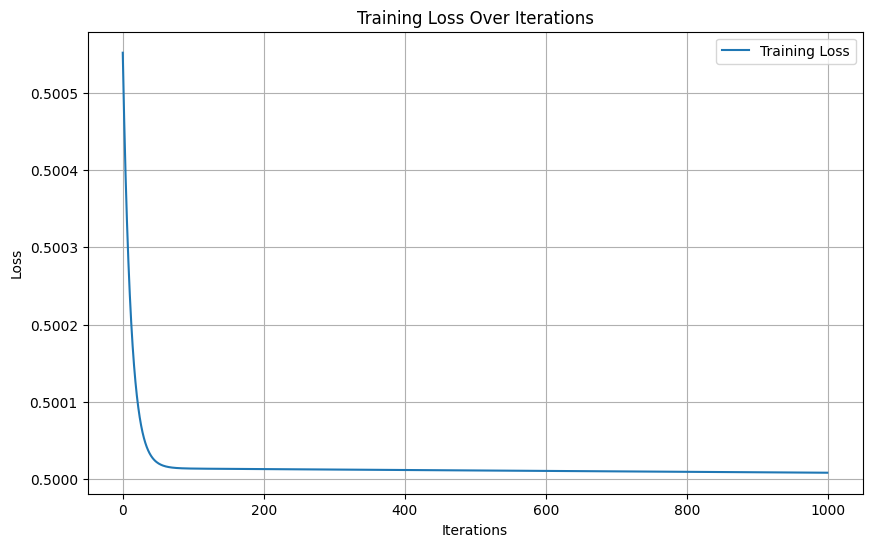

In [13]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label="Training Loss")
plt.title("Training Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()